# Warehouse Facility 01 - Productivity assessment
*This notebook illustrates how to assess the productivity of a storage system.
***
Alessandro Tufano, Ph.D. 2021

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import os
import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe


### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from analogistics.data.data_generator_warehouse import generateWarehouseData
D_locations, D_SKUs, D_movements, D_inventory = generateWarehouseData()


In [4]:
#print locations dataframe
display(HTML(D_locations.head().to_html()))

,NODECODE,IDWH,WHSUBAREA,IDLOCATION,LOCCODEX,LOCCODEY,LOCCODEZ,RACK,BAY,LEVEL
0,1,FAKE,AREA 1,1,0,0,0,0,0,0
0,1,LOGICAL_WH1,AREA 1,2,0,0,1200,0,0,1
0,1,LOGICAL_WH2,AREA 1,3,0,0,2400,0,0,2
0,1,LOGICAL_WH2,AREA 1,4,0,0,3600,0,0,3
0,1,LOGICAL_WH1,AREA 1,5,0,0,4800,0,0,4


In [5]:
#print SKUs master file dataframe
display(HTML(D_SKUs.head().to_html()))

,ITEMCODE,DESCRIPTION,VOLUME,WEIGHT
0,0,PRODOTTO_0,81.658962,3.797760
0,1,PRODOTTO_1,56.443443,8.263674
0,2,PRODOTTO_2,36.694727,8.864969
0,3,PRODOTTO_3,97.774094,3.574493
0,4,PRODOTTO_4,5.410401,5.620805


In [6]:
#print SKUs master file dataframe
display(HTML(D_movements.head().to_html()))

,ITEMCODE,NODECODE,IDWH,WHSUBAREA,IDLOCATION,RACK,BAY,LEVEL,LOCCODEX,LOCCODEY,LOCCODEZ,ORDERCODE,PICKINGLIST,QUANTITY,VOLUME,WEIGHT,TIMESTAMP_IN,INOUT,ORDERTYPE
0,33,1,LOGICAL_WH2,AREA 1,1581,4,52,0,16000,41600,0,27,27,4.482171,192.970805,15.487112,2020-01-02 01:51:32.139838,-,PICKING
0,56,1,LOGICAL_WH2,AREA 1,965,2,60,4,8000,48000,4800,724,724,32.432837,291.982576,256.181191,2020-01-02 04:27:43.430613,-,PUTAWAY
0,86,1,LOGICAL_WH1,AREA 1,1321,4,0,0,16000,0,0,13,13,21.946622,1934.525068,22.672441,2020-01-02 05:21:49.388008,,PUTAWAY
0,14,1,LOGICAL_WH2,AREA 1,750,2,17,4,8000,13600,4800,55,55,2.749971,266.052988,16.416648,2020-01-02 07:16:06.442776,-,PUTAWAY
0,8,1,LOGICAL_WH1,AREA 1,397,1,13,1,4000,10400,1200,715,715,2.421359,230.568766,20.561338,2020-01-02 10:08:11.849742,+,OTHER


In [7]:
#print SKUs master file dataframe
display(HTML(D_inventory.head().to_html()))

,NODECODE,IDWH,ITEMCODE,IDLOCATION,QUANTITY,TIMESTAMP
0,1,LOGICAL_WH1,0,1546,22.406799,2020-01-02
0,1,LOGICAL_WH1,1,385,22.897739,2020-01-02
0,1,FAKE,2,958,6.100686,2020-01-02
0,1,LOGICAL_WH2,3,705,2.993193,2020-01-02
0,1,LOGICAL_WH1,4,563,22.676102,2020-01-02


### Create folder hierarchy

In [8]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
root_path = os.path.join(pathResults,f"{string_casestudy}_results")
path_results = os.path.join(root_path,f"P8_warehouseAssessment")

os.makedirs(root_path, exist_ok=True)
os.makedirs(path_results, exist_ok=True)

### Set columns name

In [9]:
# %% SET COLUMNS MOVEMENTS
timecolumn_mov='TIMESTAMP_IN'
itemcodeColumns_mov='ITEMCODE'
inout_column_mov = 'INOUT'
x_col_mov = 'LOCCODEX'
y_col_mov = 'LOCCODEY'
z_col_mov = 'LOCCODEZ'

In [10]:
# %% SET COLUMNS SKUS
itemcodeColumns_sku='ITEMCODE'

In [11]:
# %% SET COLUMNS INVENTORY
itemcodeColumns_inv = 'ITEMCODE'

### Preprocess data

In [12]:
# %% convert to datetime
from analogistics.statistics.time_series import sampleTimeSeries
sampling_interval = 'year' # set sampling interval

D_movements['PERIOD'] = pd.to_datetime(D_movements[timecolumn_mov])
D_movements['PERIOD'] = sampleTimeSeries(D_movements['PERIOD'],sampleInterval=sampling_interval)

### Space productivity

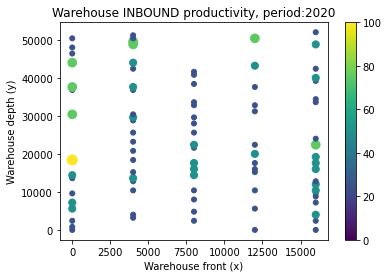

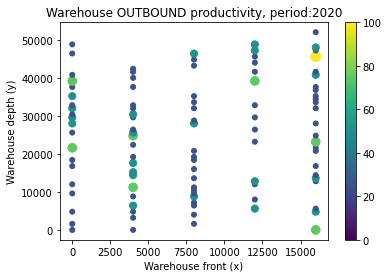

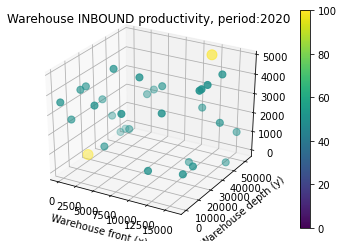

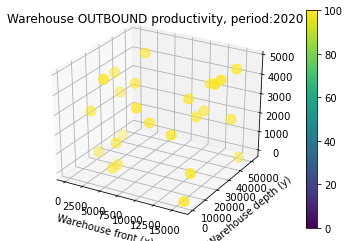

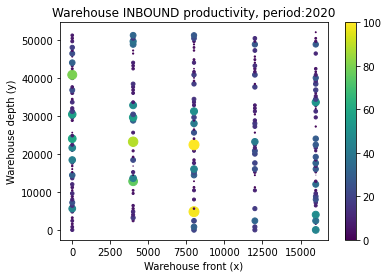

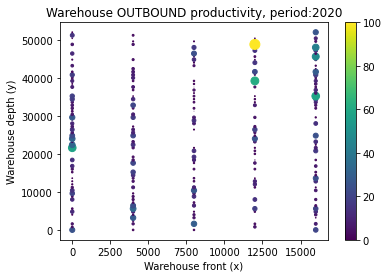

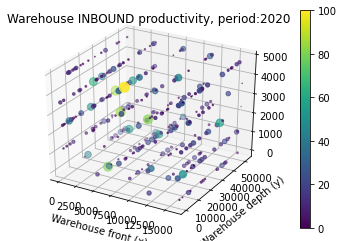

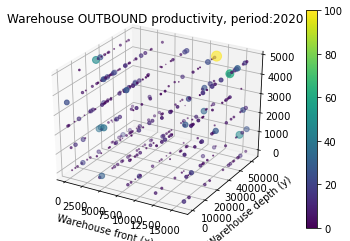

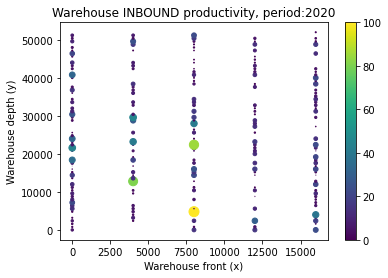

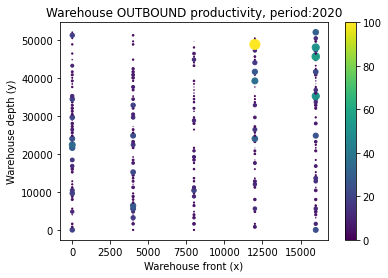

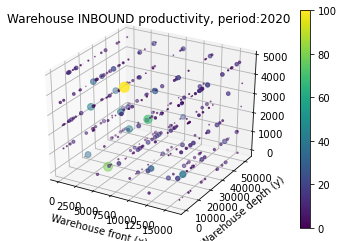

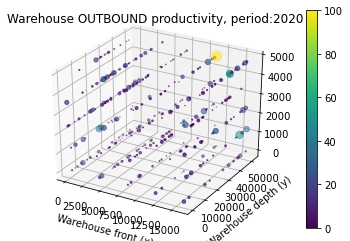

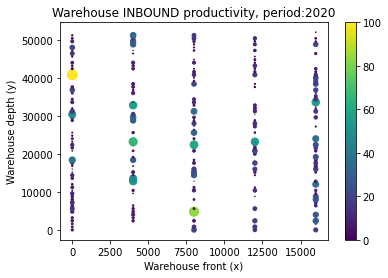

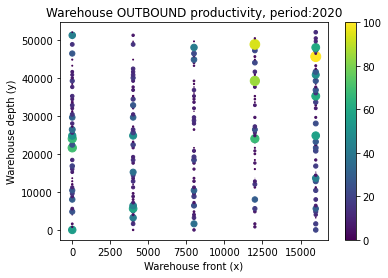

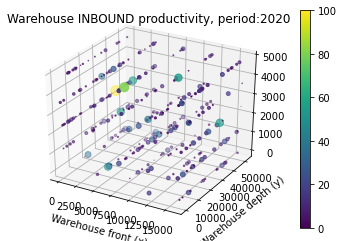

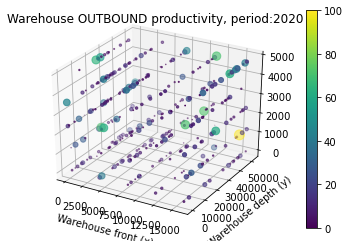

In [13]:
# %% assess productivity
from analogistics.supply_chain.P8_performance_assessment.wh_productivity_assessment import spaceProductivity

for variableToPlot in ['popularity','QUANTITY','VOLUME','WEIGHT']:
    path_current = os.path.join(path_results,f"{variableToPlot}_productivity")
    os.makedirs(path_current, exist_ok=True)
    
    fig_out_2D = spaceProductivity(D_movements,variableToPlot,inout_column_mov, x_col_mov,  y_col_mov, z_col_mov, graphType='2D',cleanData = False)
    fig_out_3D = spaceProductivity(D_movements,variableToPlot,inout_column_mov, x_col_mov,  y_col_mov, z_col_mov, graphType='3D',cleanData = False)
    
    
    #save figure
    for key in fig_out_2D.keys():
        fig_out_2D[key].savefig(path_current+f"\\{key}.png")  
    for key in fig_out_3D.keys():
        fig_out_3D[key].savefig(path_current+f"\\{key}.png") 

### Time productivity

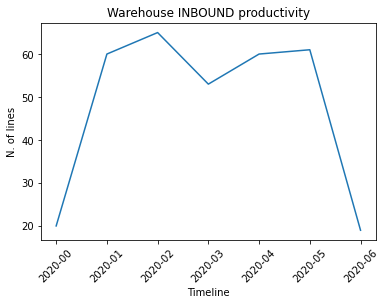

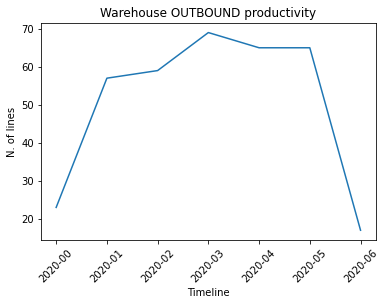

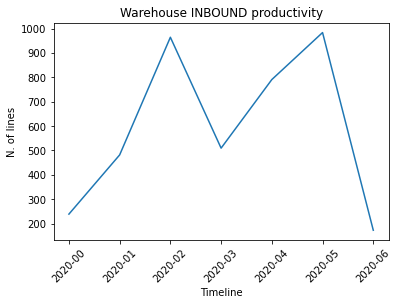

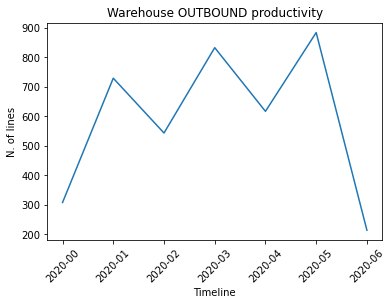

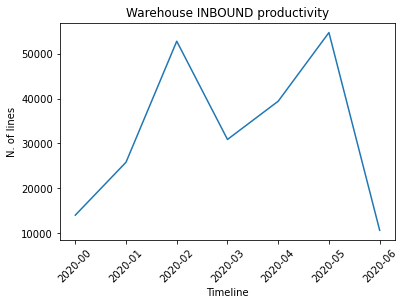

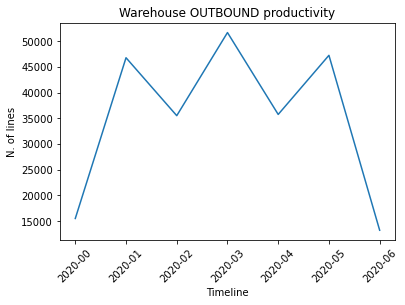

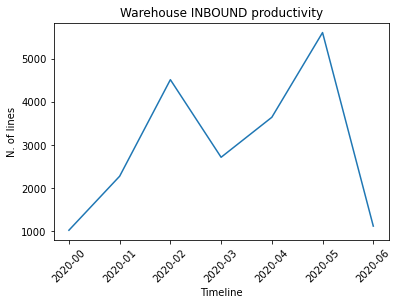

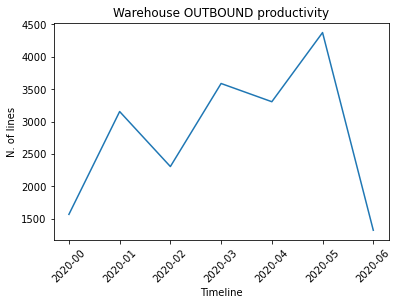

In [14]:
#resample to week
sampling_interval = 'week' # set sampling interval

D_movements['PERIOD'] = pd.to_datetime(D_movements[timecolumn_mov])
D_movements['PERIOD'] = sampleTimeSeries(D_movements['PERIOD'],sampleInterval=sampling_interval)



# %% 1D (trend) productivity plot
from analogistics.supply_chain.P8_performance_assessment.wh_productivity_assessment import timeProductivity

for variableToPlot in ['popularity','QUANTITY','VOLUME','WEIGHT']:
    path_current = os.path.join(path_results,f"{variableToPlot}_productivity")
    os.makedirs(path_current, exist_ok=True)

    fig_out_trend = timeProductivity(D_movements, variableToPlot, inout_column_mov)
    
    #save figure
    for key in fig_out_trend.keys():
        fig_out_trend[key].savefig(path_current+f"\\{key}.png")  